In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [5]:
train_data = pd.read_csv("C:\\Users\\KIIT\\Downloads\\Genre Classification Dataset\\train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(train_data.head())
print(train_data.shape)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_30548\2353717599.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("C:\\Users\\KIIT\\Downloads\\Genre Classification Dataset\\train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


In [6]:
test_data = pd.read_csv("C:\\Users\\KIIT\\Downloads\\Genre Classification Dataset\\test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_data.head()))
print(test_data.shape)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_30548\4241145221.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("C:\\Users\\KIIT\\Downloads\\Genre Classification Dataset\\test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


None
(54200, 4)


In [7]:
test_solution_data = pd.read_csv("C:\\Users\\KIIT\\Downloads\\Genre Classification Dataset\\test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_solution_data.head()))
print(test_solution_data.shape)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_30548\2666176171.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("C:\\Users\\KIIT\\Downloads\\Genre Classification Dataset\\test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(54200, 4)


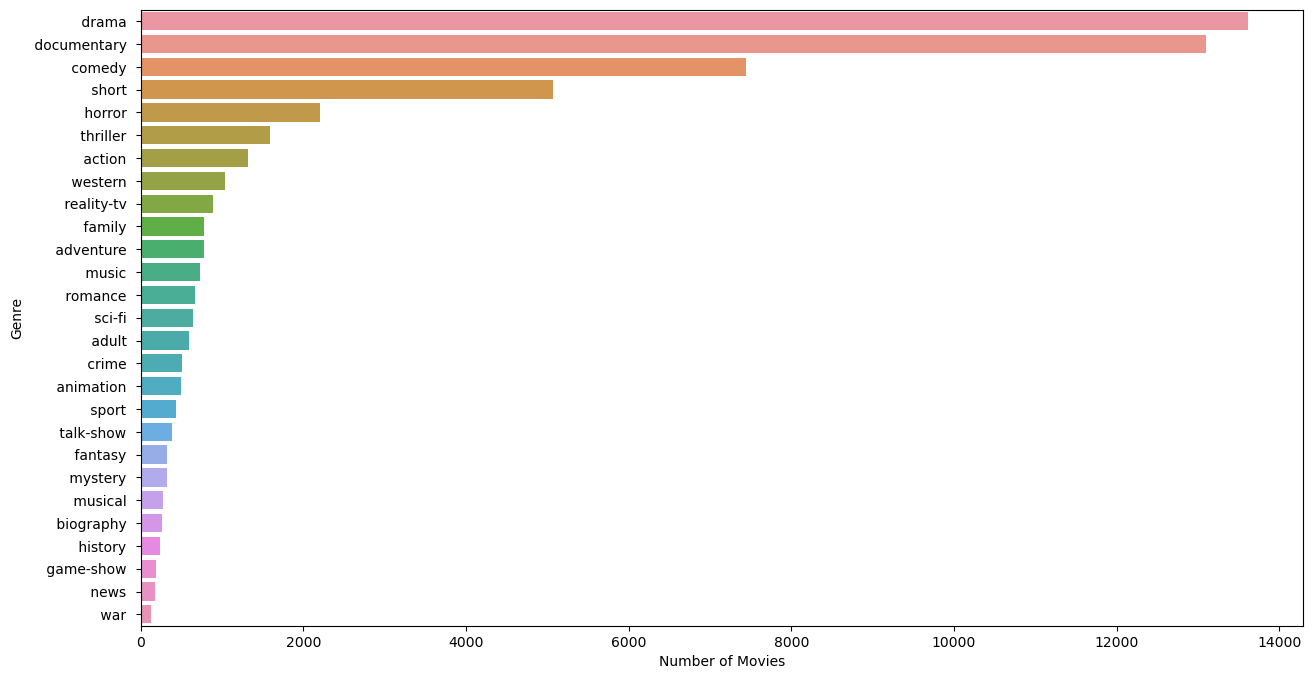

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(y=train_data['GENRE'], order = train_data['GENRE'].value_counts().index)
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

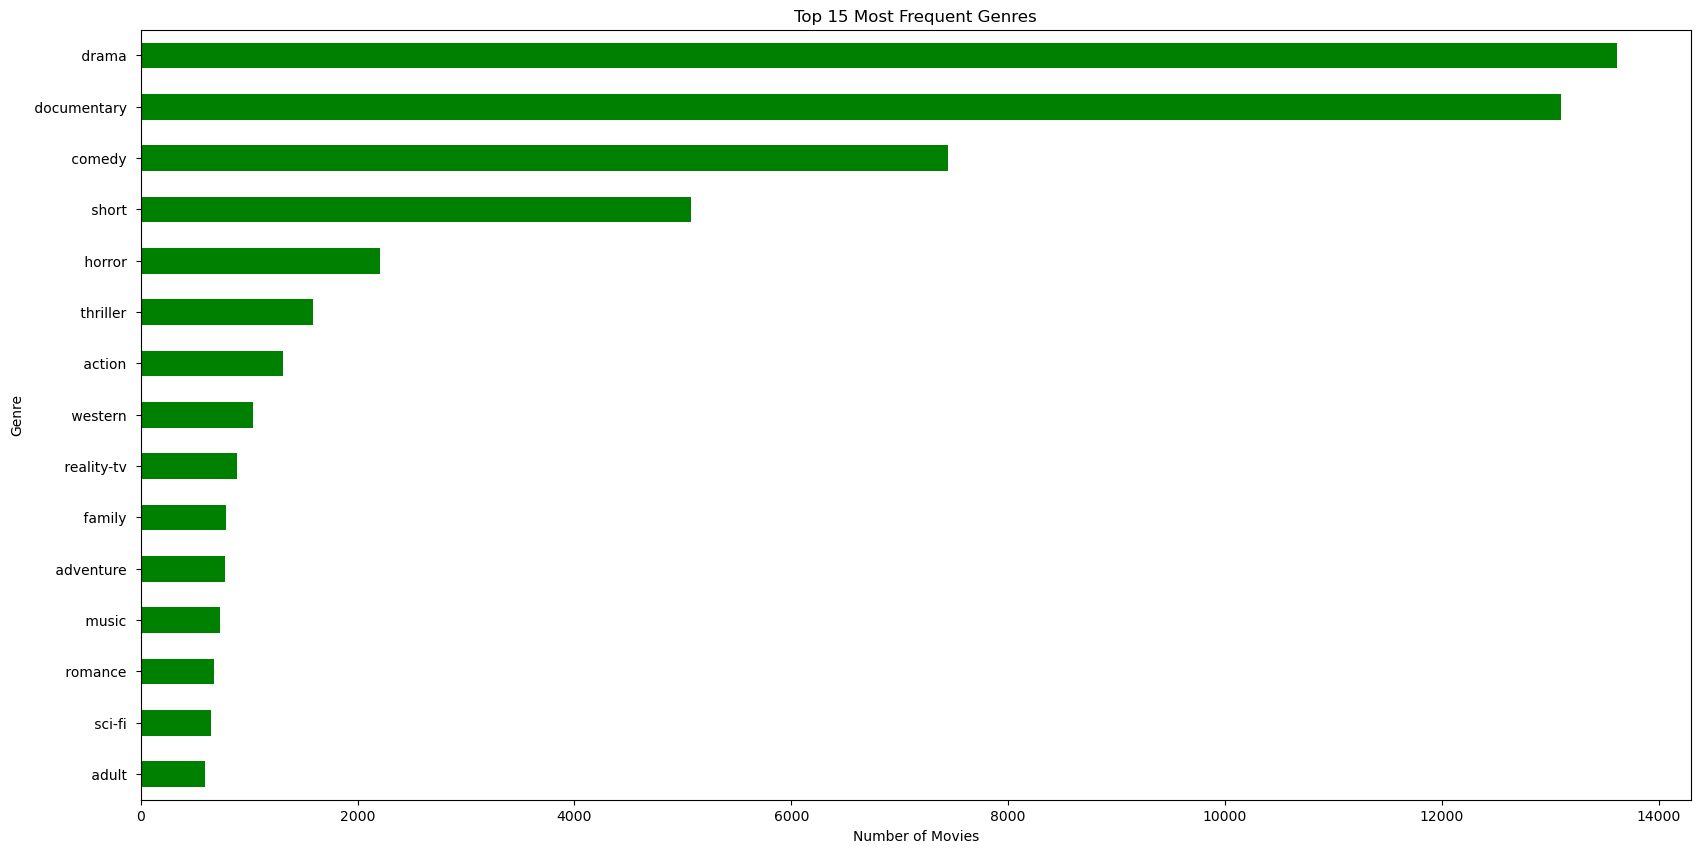

In [13]:
#Most popular genre among people
top_genres = train_data['GENRE'].value_counts().head(15)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='green')
plt.title('Top 15 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the most movies at the top
plt.show()

In [15]:
# Handle any potential missing values
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)


In [16]:
t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

In [17]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
      

In [18]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
MNB = MultinomialNB()
MNB.fit(X_train_sub, y_train_sub)

y_val_pred = MNB.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.4465553813520243
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.60      0.05      0.09      1443
           6       0.00      0.00      0.00       107
           7       0.53      0.90      0.67      2659
           8       0.38      0.88      0.53      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        40
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00       431
          14       0.00      0.00      0.00       144
          15       0.00      0.00      0.00        50
      

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
MNB_pred = MNB.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, MNB_pred))
print("Test Classification Report:\n", classification_report(y_test, MNB_pred))

Test Accuracy: 0.2511439114391144
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.25      1.00      0.40     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16      

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
LC = LogisticRegression()
LC.fit(X_train_sub, y_train_sub)

y_val_pred = LC.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.579083279535184
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.21      0.31       263
           1       0.81      0.20      0.32       112
           2       0.45      0.09      0.15       139
           3       0.75      0.03      0.06       104
           4       0.00      0.00      0.00        61
           5       0.53      0.58      0.56      1443
           6       0.50      0.01      0.02       107
           7       0.64      0.87      0.74      2659
           8       0.53      0.81      0.64      2697
           9       0.44      0.05      0.08       150
          10       0.00      0.00      0.00        74
          11       0.92      0.28      0.42        40
          12       0.00      0.00      0.00        45
          13       0.69      0.55      0.62       431
          14       0.72      0.33      0.45       144
          15       0.00      0.00      0.00        50
       

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [25]:
LC = LogisticRegression()
LC.fit(X_train, y_train)
LC_pred = LC.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, LC_pred))
print("Test Classification Report:\n", classification_report(y_test, LC_pred))

Test Accuracy: 0.2511439114391144
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.25      1.00      0.40     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16      

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [28]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "Rocky tries to propose to Rani, but she rejects him. However, she eventually realises her love for him."
print(predict_movie(sample_descr_for_movie))


sample_descr_for_movie = "Indian agent Khalid goes on a mission to hunt and eliminate his former mentor, the country's top agent Kabir who has gone rogue. A deadly war begins."
print(predict_movie(sample_descr_for_movie))

 drama 
 action 
